In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

#parte gráfica
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('./dados/DADOS_ENEM_2013_TRATADOS.zip', encoding='latin1', sep=';')
dados.head()

,inscricao,idade,sexo,cor_raça,nacionalidade,status_conclusao,tipo_escola,treineiro,municipio_prova,uf_prova,presenca_cn,presenca_ch,presenca_lc,presenca_mt,nota_cn,nota_ch,nota_lc,nota_mt,tipo_lingua,status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nota_redacao
0,210061103945,6,F,1,1,1,1,0,Caxias do Sul,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00
1,210060214087,2,F,3,1,2,2,0,Fortaleza,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00
2,210059980948,3,F,3,1,2,2,0,Quixadá,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00
3,210060801601,11,M,1,1,1,1,0,Batatais,SP,1,1,1,1,564.70,630.30,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00
4,210059085130,8,M,3,1,1,1,0,Natal,RN,1,1,1,1,644.90,620.20,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00


In [3]:
dados.shape

(2678244, 26)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678244 entries, 0 to 2678243
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   inscricao         int64  
 1   idade             int64  
 2   sexo              object 
 3   cor_raça          int64  
 4   nacionalidade     int64  
 5   status_conclusao  int64  
 6   tipo_escola       int64  
 7   treineiro         int64  
 8   municipio_prova   object 
 9   uf_prova          object 
 10  presenca_cn       int64  
 11  presenca_ch       int64  
 12  presenca_lc       int64  
 13  presenca_mt       int64  
 14  nota_cn           float64
 15  nota_ch           float64
 16  nota_lc           float64
 17  nota_mt           float64
 18  tipo_lingua       int64  
 19  status_redacao    float64
 20  nu_nota_comp1     float64
 21  nu_nota_comp2     float64
 22  nu_nota_comp3     float64
 23  nu_nota_comp4     float64
 24  nu_nota_comp5     float64
 25  nota_redacao      float64
dtypes: float64(11)

In [5]:
colunas_categoricas = ['sexo', 'cor_raça', 'tipo_escola', 'status_conclusao', 'treineiro', 
                       'municipio_prova', 'uf_prova', 'presenca_cn', 'presenca_ch', 
                       'presenca_lc', 'presenca_mt', 'tipo_lingua', 'status_redacao']
for col in colunas_categoricas:
    dados[col] = dados[col].astype('category')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678244 entries, 0 to 2678243
Data columns (total 26 columns):
 #   Column            Dtype   
---  ------            -----   
 0   inscricao         int64   
 1   idade             int64   
 2   sexo              category
 3   cor_raça          category
 4   nacionalidade     int64   
 5   status_conclusao  category
 6   tipo_escola       category
 7   treineiro         category
 8   municipio_prova   category
 9   uf_prova          category
 10  presenca_cn       category
 11  presenca_ch       category
 12  presenca_lc       category
 13  presenca_mt       category
 14  nota_cn           float64 
 15  nota_ch           float64 
 16  nota_lc           float64 
 17  nota_mt           float64 
 18  tipo_lingua       category
 19  status_redacao    category
 20  nu_nota_comp1     float64 
 21  nu_nota_comp2     float64 
 22  nu_nota_comp3     float64 
 23  nu_nota_comp4     float64 
 24  nu_nota_comp5     float64 
 25  nota_redacao      

In [6]:
dados.iloc[:, 1:].describe()

,idade,nacionalidade,nota_cn,nota_ch,nota_lc,nota_mt,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nota_redacao
count,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00
mean,4.39,1.03,495.92,526.21,520.30,534.03,122.90,141.22,120.14,131.52,110.82,626.61
std,3.50,0.21,87.77,86.79,74.11,131.52,34.30,50.40,42.41,42.61,61.02,209.03
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,1.00,440.60,471.20,473.70,431.40,120.00,120.00,100.00,120.00,60.00,520.00
50%,3.00,1.00,494.00,532.90,524.90,523.80,120.00,140.00,120.00,120.00,120.00,620.00
75%,5.00,1.00,551.30,586.90,571.80,630.30,140.00,180.00,140.00,160.00,160.00,780.00
max,20.00,4.00,868.40,823.00,820.80,958.60,200.00,200.00,200.00,200.00,200.00,1000.00


In [7]:
dados.nunique()

inscricao           2678244
idade                    20
sexo                      2
cor_raça                  6
nacionalidade             5
status_conclusao          4
tipo_escola               3
treineiro                 2
municipio_prova        1715
uf_prova                 27
presenca_cn               1
presenca_ch               1
presenca_lc               1
presenca_mt               1
nota_cn                5036
nota_ch                4811
nota_lc                4760
nota_mt                6056
tipo_lingua               2
status_redacao            8
nu_nota_comp1            11
nu_nota_comp2            10
nu_nota_comp3            12
nu_nota_comp4            11
nu_nota_comp5            11
nota_redacao             50
dtype: int64

In [8]:
m = dados[dados['sexo'] == 'M'].shape
f = dados[dados['sexo'] == 'F'].shape
print(f"A quantidade de participantes Masculina foi de {m[0]} participantes")
print(f"A quantidade de participantes Feminina foi de {f[0]} participantes")

A quantidade de participantes Masculina foi de 1034206 participantes
A quantidade de participantes Feminina foi de 1644038 participantes


Text(0, 0.5, 'Quantidade')

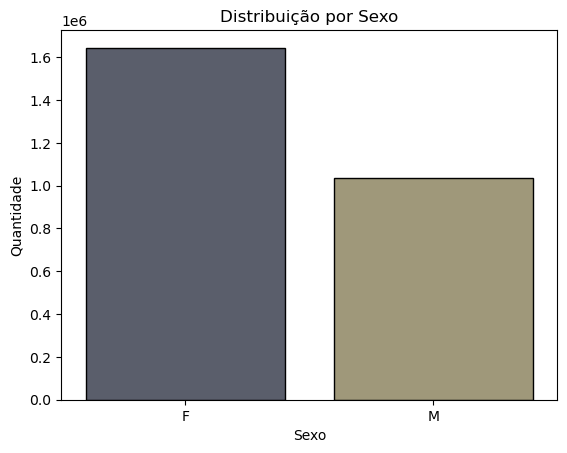

In [9]:
sexo_counts = dados['sexo'].value_counts()
cores = ['#D62728', '#1f77b4']
#plt.figure(figsize=(8, 6))
#plt.bar(sexo_counts.index, sexo_counts.values, color=cores, edgecolor='black')

sns.countplot(data=dados, x='sexo', hue='sexo', palette='cividis', edgecolor='black', legend=False)

plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

In [10]:
raca = {
    0: 'Não Declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Sem informação'
}
dados['cor/raca'] = dados['cor_raça'].map(raca)

In [11]:
dados['cor/raca'].value_counts()

cor/raca
Branca           1153775
Parda            1117217
Preta             316995
Amarela            42674
Não Declarado      33230
Indígena           14353
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

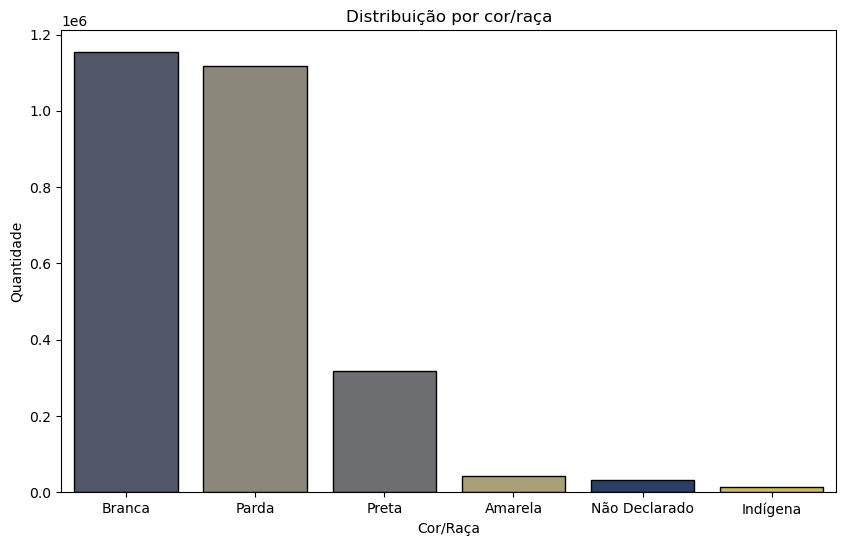

In [12]:
plt.figure(figsize=(10, 6))
ordem = dados['cor/raca'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='cor/raca', hue='cor/raca', palette='cividis', order=ordem, edgecolor='black', legend=False)

plt.title('Distribuição por cor/raça')
plt.xlabel('Cor/Raça')
plt.ylabel('Quantidade')
plt.show()

In [13]:
faixa_etaria = {
    1: '-17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: '26-30 anos',
    12: '31-35 anos',
    13: '36-40 anos',
    14: '41-45 anos',
    15: '46-50 anos',
    16: '51-55 anos',
    17: '56-60 anos',
    18: '61-65 anos',
    19: '66-70 anos',
    20: 'maior de 70 anos'
}
dados['faixa_idade'] = dados['idade'].map(faixa_etaria)
dados['faixa_idade'] = pd.Categorical(dados['faixa_idade'], categories=faixa_etaria.values(), ordered=True)

In [14]:
dados['faixa_idade'].value_counts().sort_values(ascending=False)

faixa_idade
18 anos             682825
17 anos             620795
19 anos             292329
-17 anos            288515
20 anos             169356
26-30 anos          114427
21 anos             108732
22 anos              77813
31-35 anos           60221
23 anos              59720
24 anos              46689
36-40 anos           44933
25 anos              36110
41-45 anos           31615
46-50 anos           20127
51-55 anos           12350
56-60 anos            6974
61-65 anos            3038
66-70 anos            1193
maior de 70 anos       482
Name: count, dtype: int64

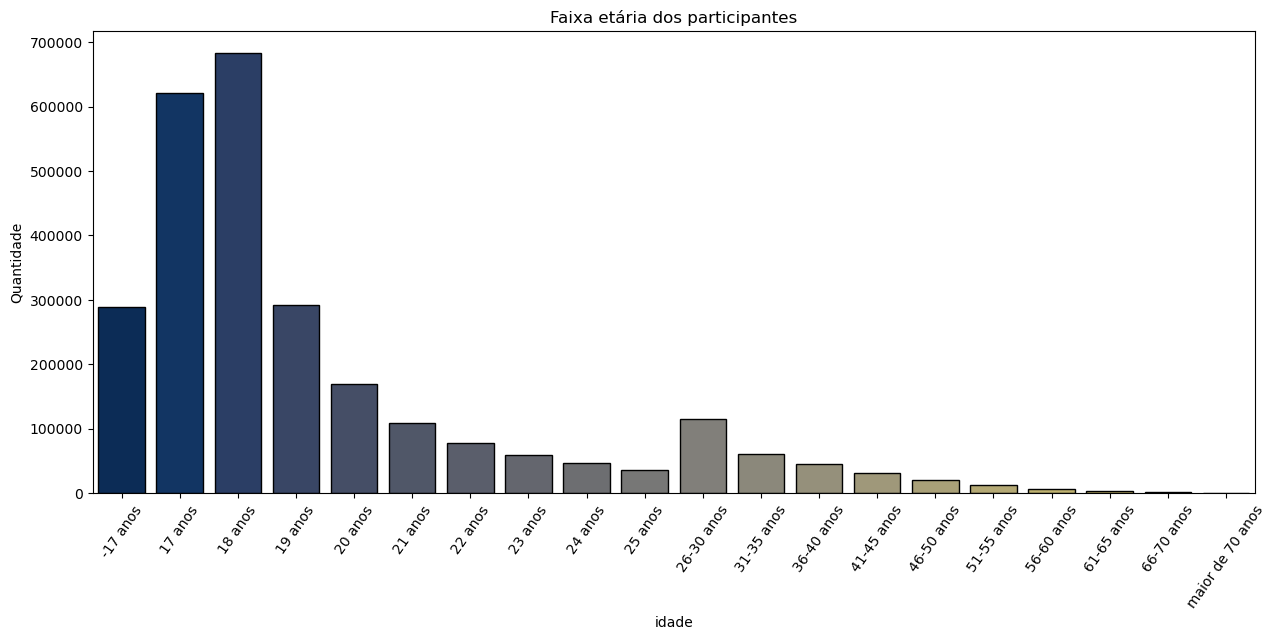

In [15]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dados, x='faixa_idade', hue='faixa_idade', palette='cividis', edgecolor='black', legend=False)
plt.title('Faixa etária dos participantes')
plt.xlabel('idade')
plt.ylabel('Quantidade')
plt.xticks(rotation=55)
plt.show()

In [16]:
#Nacionalidade (ou apenas brasileiros vs estrangeiros)
nacionalidade = {
    0: 'Não Informado',
    1: 'Brasileiro(a)',
    2: 'Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'BR nasc(a) no exterior'
}
dados['tp_nacionalidade'] = dados['nacionalidade'].map(nacionalidade)

In [17]:
dados['tp_nacionalidade'].value_counts()

tp_nacionalidade
Brasileiro(a)             2618369
Naturalizado(a)             47605
BR nasc(a) no exterior       6336
Estrangeiro(a)               4690
Não Informado                1244
Name: count, dtype: int64

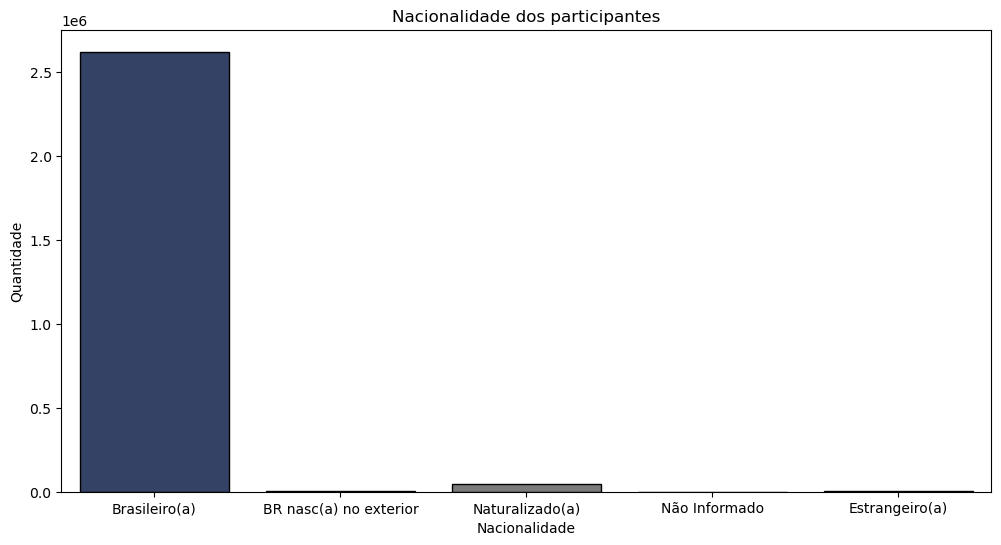

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados, x='tp_nacionalidade', hue='tp_nacionalidade', palette='cividis', edgecolor='black', legend=False)
plt.title('Nacionalidade dos participantes')
plt.xlabel('Nacionalidade')
plt.ylabel('Quantidade')
#plt.xticks(rotation=55)
plt.show()

In [19]:
#Treineiros vs não treineiros
treineiro = {
    0: 'Não',
    1: 'Sim'
}
dados['in_treineiro'] = dados['treineiro'].map(treineiro)

In [20]:
dados['in_treineiro'].value_counts()

in_treineiro
Não    2166824
Sim     511420
Name: count, dtype: int64

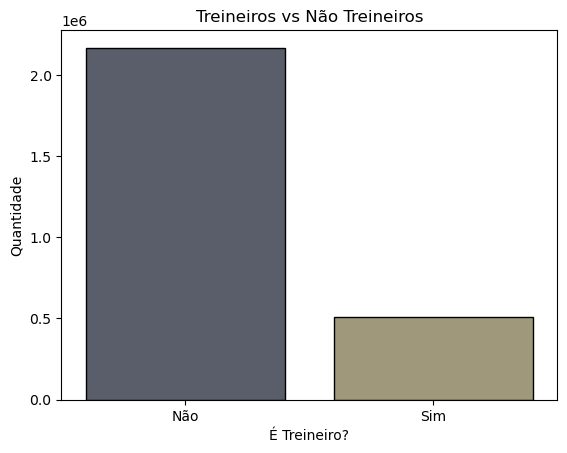

In [21]:
#plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='in_treineiro',  hue='in_treineiro', palette='cividis', edgecolor='black', legend=False)
plt.title('Treineiros vs Não Treineiros')
plt.xlabel('É Treineiro?')
plt.ylabel('Quantidade')
#plt.xticks(rotation=55)
plt.show()